In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import galkin
import galkin.processdata   # routines to process kinematic data
import galkin.readparsFile  # routines to read and check input parameters
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
alpha_h_I = -2.
beta_h_I = 2.96
R_d_I = 2.0#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2
#params = np.array([alpha_h_I,beta_h_I])

In [10]:
#tose functions can go in a script 
def Vc_b(R,q_b=q_b,alpha_b=alpha_b,r_b=r_b,a_b=a_b):
    def I_b(x,R):
        e = np.sqrt(1. - q_b**2.)
        n = x**(2.-alpha_b)*np.exp(-(R**2.*x**2.)/r_b**2.)
        d = np.sqrt(1.-x**2.*e**2.)
        t = R**2.*(R/a_b)**(-alpha_b)
        return (t*n)/d
    Integral_b = []
    for i in range (0,len(R)):
        result = integrate.quad(I_b,0,1,args=(R[i]))[0]
        Integral_b.append(result)
    return np.array(Integral_b)
def Vc_DM(R,alpha_h,a_h,beta_h,q_h):
    def I_h(x,R):
        e = np.sqrt(1.- q_h**2.)
        n = x**(2.-alpha_h)*(1.+ (x*R)/(a_h))**(alpha_h-beta_h)
        d = np.sqrt(1-x**2.*e**2)
        t = R**2.*(R/a_h)**(-alpha_h)
        result = (t*n)/d
        return result
    Integral_DM = []
    for i in range (0,len(R)):
        result = integrate.quad(I_h,0,1,args=(R[i]))[0]
        Integral_DM.append(result)
    return np.array(Integral_DM)
def V2_c_SD(R,R_d):
    result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*R_d/R)
    return result
def Vc_ISM(R,R_d,R_m):
    def M_g_ISM(u,R):
        return R*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
    Integral_M_g = []
    for i in range (0,len(R)):
        result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
        Integral_M_g.append(result)
    return np.array(Integral_M_g)

In [20]:
def Vc_prueba_b(R,parameter):
    rho_b = parameter 
    V_b = 4.*np.pi*G*q_b*rho_b*Vc_b(R)
    return np.sqrt(V_b)

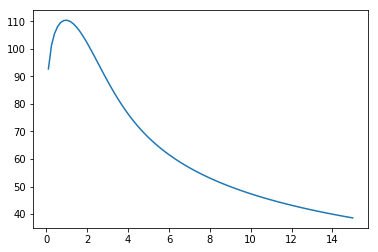

In [21]:
plt.plot(R,Vc_prueba_b(R,rho_b_I))

In [4]:
def Vc_ah_alpha(R,params,*args):
    a_h,alpha_h = params
    suma = 4.*np.pi*G*q_b*rho_b*Vc_b(R) + 4.*np.pi*G*q_h*rho_h*Vc_DM(R) + 2.*np.pi*G*Sigma_d_SD*R_d*V2_c_SD(R) + 2.*np.pi*Sigma_g_ISM*G*Vc_ISM(R)
    return np.sqrt(suma)

In [5]:
R = np.linspace(0.1,15.,100)
params_a_alpha = np.array([a_h_I,alpha_h_I])

In [6]:
plt.plot(R,Vc_ah_alpha(R,params_a_alpha,rho_b=rho_b_I,rho_h=rho_h_I,beta_h=beta_h_I,R_d=R_d_I,Sigma_d_SD=Sigma_d_SD_I,Sigma_g_ISM=Sigma_g_ISM_I))

TypeError: Vc_ah_alpha() got an unexpected keyword argument 'rho_b'